# [E-15] OCR

> 목차
-


**1. 개요**  
    
    1.1 프로젝트 과정 및 목표  
    1.2 예상되는 문제점    

**2. 루브릭 평가기준**  

**3. Project**
    
    3.1 검증용 데이터셋 준비    
    3.2 keras-ocr  
    3.3 Tesseract  

**4. 회고**
    
    4.1 결과 분석과 결론 제시  
    

---
> **1. 개요**
-

> **1.1 프로젝트 과정 및 목표**

**<프로젝트 과정>**
1. 검증용 데이터셋 준비
2. keras-ocr
3. Tesseract
4. 결과 분석 및 결론 제시

**<프로젝트 목표>**  
도서관에 갔을때 원하는 책을 검색해서 어느 위치에 있는지는 확인이 가능하지만 책읽는 사람들이 가끔 아무렇게나 꽂아두는 경우가 있습니다. 
그 경우에 항상 헤맸던 기억이 있어서 이 시간을 단축하기 위해서 사진으로 찍어서 ocr로 검출하는게 목표입니다.  
따라서,  
- 영어+한글 혼용이어도 어느 책인지를 인식한다.
- 없다고 비슷한 책을 찾아내는게 아닌 없으면 없는대로 인식이 되어야 한다.  
- 작은 글씨, 큰 글씨가 있을텐데 이에 분별없이 구분이 가능해야한다.  

> **1.2 예상되는 문제점**

도서관에서 책찾을때 기준으로 적용해서 영어와 한글이 혼합되어 있을텐데 이를 제대로 읽을 수 있을지가 걱정입니다.  
아마 케라스에서는 한국어 호환이 안되기 때문에 한국어 도서의 경우엔 식별이 제대로 안될것이다.

---
> **2. 루브릭 평가기준**
-

|평가문항 | 상세기준|
|:---------|:---------|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가? | 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가? | 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?| 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

---
> **3. Project**
-

> 3.1. 검증용 데이터셋 준비

In [1]:
import os
path = []
for i in range(1,21):
    path.append(os.getenv('HOME')+'/aiffel/ocr_python/'+str(i)+'.jpg')


In [2]:
path

['/aiffel/aiffel/ocr_python/1.jpg',
 '/aiffel/aiffel/ocr_python/2.jpg',
 '/aiffel/aiffel/ocr_python/3.jpg',
 '/aiffel/aiffel/ocr_python/4.jpg',
 '/aiffel/aiffel/ocr_python/5.jpg',
 '/aiffel/aiffel/ocr_python/6.jpg',
 '/aiffel/aiffel/ocr_python/7.jpg',
 '/aiffel/aiffel/ocr_python/8.jpg',
 '/aiffel/aiffel/ocr_python/9.jpg',
 '/aiffel/aiffel/ocr_python/10.jpg',
 '/aiffel/aiffel/ocr_python/11.jpg',
 '/aiffel/aiffel/ocr_python/12.jpg',
 '/aiffel/aiffel/ocr_python/13.jpg',
 '/aiffel/aiffel/ocr_python/14.jpg',
 '/aiffel/aiffel/ocr_python/15.jpg',
 '/aiffel/aiffel/ocr_python/16.jpg',
 '/aiffel/aiffel/ocr_python/17.jpg',
 '/aiffel/aiffel/ocr_python/18.jpg',
 '/aiffel/aiffel/ocr_python/19.jpg',
 '/aiffel/aiffel/ocr_python/20.jpg']

> 3.2. keras-ocr

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [4]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://postfiles.pstatic.net/MjAyMjAyMjRfMjk2/MDAxNjQ1NjgyNTkzOTEw.rSUVc5LPu683MF8FygFt3qzbUndKqhBvyDCdhZWg8V0g.LsUaPqqz3qSjf3xgSKasy7Dao1BSLRIjBJHWKBupCo4g.JPEG.dasu33/10.jpg?type=w773',
  'https://postfiles.pstatic.net/MjAyMjAyMjRfNiAg/MDAxNjQ1NjgyNTkzOTQ4.fVwOFtuVXovbe_W0jEgm1GFpYpAeZbgKwG5ZiZ_oJc8g.ZSJ8_zGxm24b9-yqxiJ6SddsouK4hrsia7_De98ntEog.JPEG.dasu33/11.jpg?type=w773',
  'https://postfiles.pstatic.net/MjAyMjAyMjRfMTcg/MDAxNjQ1NjgyNTkzOTY4.yiYzA5TccYhKCcd-DMGeJ4FUOVMynFPIzgr4DBMhb_Eg.OZ8AiriMUR8TijkcP2Rs38pm2wIYWLy3_Dn6SNQU1ZAg.JPEG.dasu33/12.jpg?type=w773',
  'https://postfiles.pstatic.net/MjAyMjAyMjRfMTg1/MDAxNjQ1NjgyNTkzOTU4.9f8O0YMqm0NY9a70DULpE9r0D4aEWNA1zuetjtd0NPAg.fZ2hUr90CxXuNJl54w_oK-FNaVFVy4bfDF2HeAc7VJog.JPEG.dasu33/13.jpg?type=w773',
  'https://postfiles.pstatic.net/MjAyMjAyMjRfMjcx/MDAxNjQ1NjgyNTkzOTYy.C1mXtQQrNT2BNlL-IHx-7bqwl5T6ZoGO2kyhPBXYTfQg.8VJBdJLeyI2ykXbD6I6a47TJ0MF6uLhnmJ5U7v3DOvgg.JPEG.dasu33/14.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjY5/MDAxNjQ1NjgyNTk0MTE2.fEaKLWLdU7Vf7otW2CaP2m_PZ3v-0c9s2PppVusnMdAg.87DDwJN-2KzHDGWZgWPx1j40bkYD2KOLQfVF6uGGzhog.JPEG.dasu33/15.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMTg1/MDAxNjQ1NjgyNTk0Mzg1.QvjY-BVGzWGmNtozl8coJ7aEla9R8LBltr4uQMo6sIQg.QNHgVn_3OW9pUMM6FfeewxyKb652bg66nrji9dWDrgkg.JPEG.dasu33/16.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjI1/MDAxNjQ1NjgyNTk0MzYw.J5yGrZ1OZ8VyOVWjxs7TlPkpH9twhrEMsgN0xCFb3hkg.GZDYWcugflTgrGHKV5e3FLO4OTSd1Nma7jqub16RrZEg.JPEG.dasu33/17.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMTky/MDAxNjQ1NjgyNTk0Mzk1.Vx2QAUyLoKdut48xeDkcV4N1_nX1ias36mf_RcL--5cg.Y66Xa35HhjIhRhiVy94Wh7-rn72XdHGE8evBZ2KUtgcg.JPEG.dasu33/18.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjkz/MDAxNjQ1NjgyNTk0NDA2.oZRJihlcV3RpW2sCSAMbjoDZfdEdubM7VF-erMg6F5Ig.PvWaq7zhLGcdGI3k0Q6c75PnneR2-YuzanSddO-1pb8g.JPEG.dasu33/19.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjM5/MDAxNjQ1NjgyNTk0NTEy.GMUA0Qx-nhBKzgkr2FQqWW8aGAlVaKOlGSBSbKjz7FMg.g4mID3zkK0yEOOhvRnmlEAtLv4RyrQwGpRIJFh9bM2Mg.JPEG.dasu33/20.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMzAg/MDAxNjQ1NjgyNTk0NzUy.TPKaoMzr7i97NEpTd26zZvA6D4r1PL8i4bstcFZGGTEg.TdW-OF0dEqYfe-15d_njl56YpPyoe7CJrhg7rh0pq-Ag.JPEG.dasu33/1.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjA3/MDAxNjQ1NjgyNTk0ODQ4.1Qm02DAXenFGCsKtUifCD2d-155acO__elurha8V_-Qg.UbOrgF8U0AeXJItW1hhslXr6aHlXI4o-ko8eUTOqqHsg.JPEG.dasu33/2.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfOTUg/MDAxNjQ1NjgyNTk4NzY4.3j_hrkHQrlorgle69DGcKo2JnsLhspZMhiJIViEUM7cg.0zthSTxmns8BvbVaYXJSQXNBFpLbhK165ucMASxp9Gcg.JPEG.dasu33/3.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMTEy/MDAxNjQ1NjgyNjAwMzIx.PwiDHB7GQmttvNG-wruME3TlzGg4-kIfkqaUn1XFOJcg.eP2sqn5KmFRurPg-MWQGXhh2JoXgWI_wuAuYDOvfThUg.JPEG.dasu33/5.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjI2/MDAxNjQ1NjgyNjAwMzg2.FyM1MMw0P9PNkx9zq5S6zcm2PfgUVIYxEC2x2h9lhO4g.2OTIj8joh0Fe4DwzdfY74gUnSKVkDjNmcPt-4NgG-DUg.JPEG.dasu33/4.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjgw/MDAxNjQ1NjgyNjAzNzIz.LPFw44XUhtCgohMhJJC_tVrzq1du7BN5jxvBaQPSwfQg.-FogjbbIgQXuB4jlHp7wCE5ft4U_nX08GmhtqcMDYYgg.JPEG.dasu33/6.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMzMg/MDAxNjQ1NjgyNjA0NjEw.r_kdzBluhjTrKvH12CJ-yu42naY-77NNmV0G0j5h-dwg.9omsOJhdEtqSikTz8eoGDuYOCPoEQVBMclAD6ol3Kekg.JPEG.dasu33/7.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfNDkg/MDAxNjQ1NjgyNjAxNDY0.ahJDliEzDL3Ju-5ozJjppAEhXmlY51cZtRSDIfxozZcg.DzA3djPRzHFawe4cekGZh5bP0l-DDVVqvLjKswMKN8Eg.JPEG.dasu33/8.jpg?type=w773',
    'https://postfiles.pstatic.net/MjAyMjAyMjRfMjMg/MDAxNjQ1NjgyNjA1MTA1.Jb5TXCzVVc2edBfQLynhlO3ug6nd3nCjou2wDndW5QYg.74Hc0UB6YG62l3c-Biu0vaBPEULD-PBlljPozNji2v4g.JPEG.dasu33/9.jpg?type=w773'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

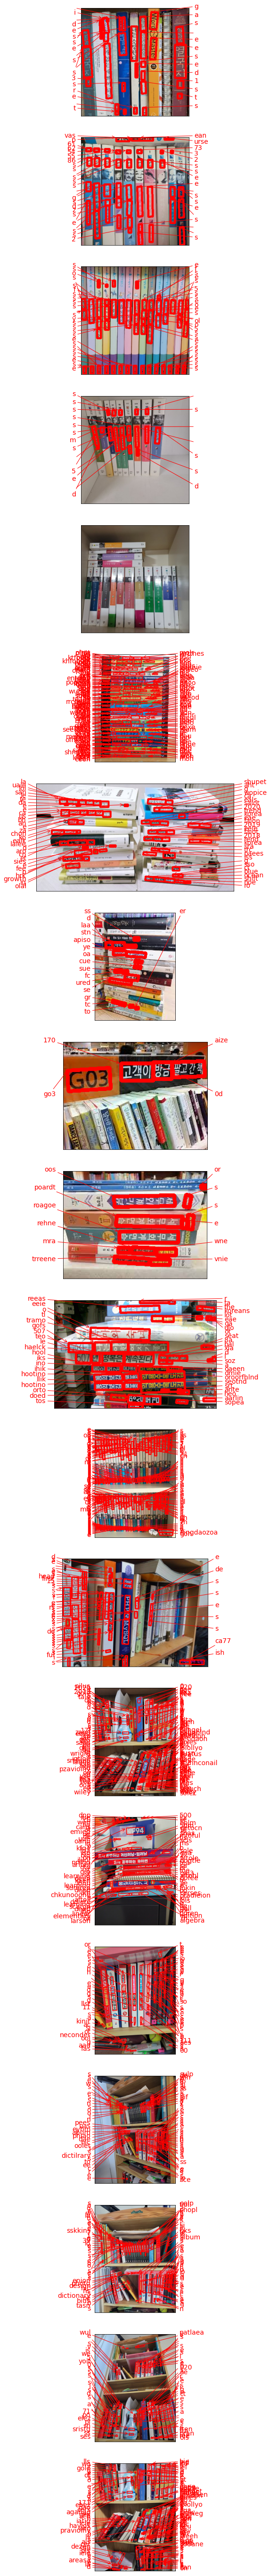

In [5]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

> 3.3. Tesseract

In [6]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [7]:
images = [] 
for i in range(1,21):
    images.append(Image.open(path[i-1]))

In [8]:
for i in range(20):
    print(images[i].size)

(540, 720)
(740, 547)
(4624, 3468)
(4624, 3468)
(4624, 3468)
(4624, 3468)
(4624, 3468)
(4624, 3468)
(4624, 3468)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(764, 1018)
(800, 436)
(194, 259)
(260, 194)
(259, 194)
(500, 332)


In [12]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    
    image = Image.open(image_path)
#     image = image.resize((180,180)) # 크기 조정

    recognized_data = pytesseract.image_to_data(
        image, lang='eng+kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor+eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'], end=' ') # 지나친 줄바꿈 방지를 위해서 end 사용
    print("Done")


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

for i in range(1,21):
    try:
        img_file_path = work_dir + '/'+str(i)+'.jpg'
        print(f'{i}번 사진')
        print('--------------------------------------------------------------')
        cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
        recognize_images(cropped_image_path_list)
    except AttributeError:
        print(f"{i}번 사진 에러 발생")
    except SystemError:
        print()

1번 사진
--------------------------------------------------------------
/aiffel/aiffel/ocr_python/0000.png

2번 사진
--------------------------------------------------------------
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png

3번 사진
--------------------------------------------------------------
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_py

> **4. 회고**
-

> 4.1 결과 분석 및 결론 정리

결론적으로 현재 이대로 사용해서는 실적용은 불가능하다고 판단이 됩니다. 나오는 값들이 정확하지도 않고 무엇보다 인식자체가 안되는 경우가 많아서 텍스트 자체가 별로 출력되지않았습니다.  

어떤 문제로 인해서 이렇게 발생하는지는 정확하게 알 수 없었지만 제가 찾아낼 수 있었던 에러는  
1. keras-ocr의 경우엔 영어만 인식됩니다. 근데 인식되는 텍스트가 한글도 영어로 인식하는등 부적절함을 보여줬습니다.
2. 테서렉트 같은 경우엔 한글도 호환된다고 배워서 기대했는데 사진 크기가 충분하지 않으면 사진 부분부분을 잘라서 텍스트 구분을 하는게 불가능해져서 여러 유의미한 방법들이 무용지물이 됩니다.
3. 자르지 않고도 시험해봤는데 인식되는 텍스트의 질이 좋지 않음을 알 수 있었다... 

그렇다면 이런 일들을 개선할 방법은 어떤것이 있을까?  
1. 우선적으로 들었던 생각은 일단 사진의 사이즈가 커야 유리할것이라 생각을 했습니다. 하지만 아주 작은 사진을 임의로 크게한다면 글자로 인식하는데 또다른 문제가 생길겁니다...
2. 임의로 제 책장의 사진 및 중고서점들의 사진을 이용해서 시험했는데, 좀 더 통일성 있는 지표를 사용한다면 훨씬 더 유의미한 결과가 나올 것이라 생각됩니다.